In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy

In [3]:
Config_file = "ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt"

Frozen_file = "frozen_inference_graph.pb"

In [4]:
model = cv2.dnn_DetectionModel(Frozen_file, Config_file)

In [5]:
Labels =[]

present_lebal = "labels.txt"

with open(present_lebal,"rt") as stp:
    Labels = stp.read().rstrip("\n").split("\n")
    Labels.append(stp.read())

In [6]:
print(Labels)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush', '']


In [7]:
print(len(Labels))

81


In [8]:
model.setInputSize(320, 320) #greater this value better the reults tune it for best output
model.setInputScale(1.0/127.5)
model.setInputMean((127.5, 127.5, 127.5))
model.setInputSwapRB(True)

< cv2.dnn.Model 000001EAFFC1C1B0>

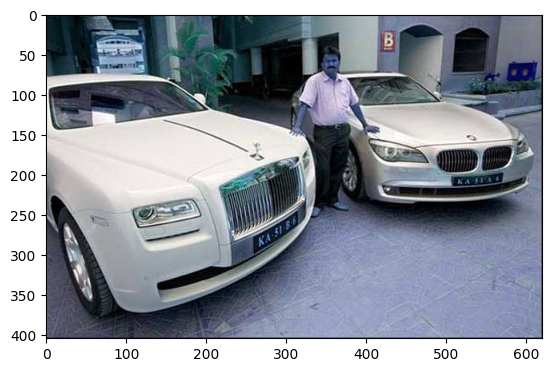

In [9]:
img = cv2.imread("3.jpeg")
#cv2.resize(img, (224,224))

plt.imshow(img)

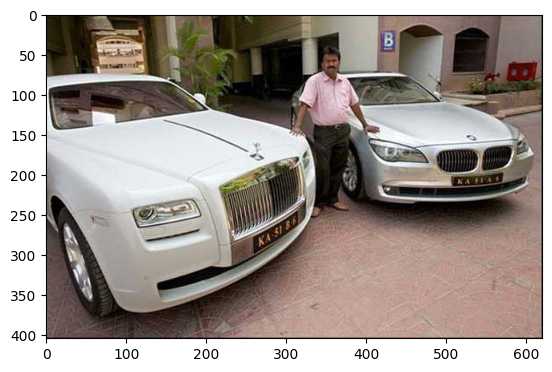

In [10]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [11]:
classIndex, confidence, bbox = model.detect(img, confThreshold=0.5)

In [12]:
font = cv2.FONT_HERSHEY_PLAIN

for classInd, conf, boxes in zip(classIndex.flatten(), confidence.flatten(), bbox):
    cv2.rectangle(img, boxes, (255, 0, 0), 2)
    cv2.putText(img, Labels[classInd-1], (boxes[0] + 10, boxes[1] + 40), font, fontScale = 3, color=(0, 255, 0), thickness=2)
    

In [13]:
cv2.imshow('result', img)
cv2.waitKey(0)

cv2.imwrite('result.png', img)

True

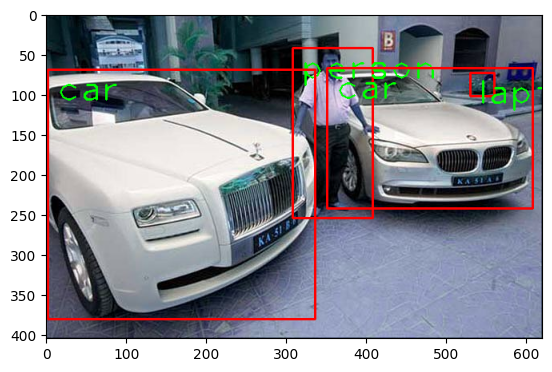

In [14]:
plt.imshow(img)

In [ ]:
video = cv2.VideoCapture("people_walk.mp4")

if not video.isOpened():
    video = cv2.VideoCapture(0)
if not video.isOpened():
    raise IOError("Video is Not Oppen")

    
Font_Scale = 3
font = cv2.FONT_HERSHEY_PLAIN

while(True):
    ret, frame = video.read()
    classIndex, confidence, bbox = model.detect(frame , confThreshold=0.65)
    if(len(classIndex) != 0):
        for classInd, boxes in zip(classIndex.flatten(), bbox):
            cv2.rectangle(frame, boxes, (255, 0, 0), 2)
            cv2.putText(frame, Labels[classInd-1], (boxes[0] + 10, boxes[1] + 40), font, fontScale = 1, color=(0, 255, 0), thickness=2)

    cv2.imshow("object detected", frame)
    if cv2.waitKey(2) & 0xFF == ord("q"):
        break
video.release()
cv2.destroyAllWindeows()

In [ ]:
video = cv2.VideoCapture(0)

if not video.isOpened():
    video = cv2.VideoCapture(0)
if not video.isOpened():
    raise IOError("Video is Not Oppen")

    
Font_Scale = 3
font = cv2.FONT_HERSHEY_PLAIN

while(True):
    ret, frame = video.read()
    classIndex, confidence, bbox = model.detect(frame , confThreshold=0.65)
    if(len(classIndex) != 0):
        for classInd, boxes in zip(classIndex.flatten(), bbox):
            cv2.rectangle(frame, boxes, (255, 0, 0), 2)
            cv2.putText(frame, Labels[classInd-1], (boxes[0] + 10, boxes[1] + 40), font, fontScale = 1, color=(0, 255, 0), thickness=3)

    cv2.imshow("object detected", frame)
    if cv2.waitKey(2) & 0xFF == ord("q"):
        break
video.release()
cv2.destroyAllWindeows()